In [2]:
#import Libraries 

import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.model_selection import train_test_split

# Load Dataset

In [4]:
# Load the dataset
X_train = np.loadtxt('input.csv', delimiter=',')
Y_train = np.loadtxt('labels.csv', delimiter=',')
X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')

In [5]:
# Reshape and normalize the dataset
X_train = X_train.reshape(len(X_train), 100, 100, 3) / 255.0
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3) / 255.0
Y_test = Y_test.reshape(len(Y_test), 1)

In [6]:
# Split training data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)


In [7]:
# Print shapes of the datasets
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_val: ", X_val.shape)
print("Shape of Y_val: ", Y_val.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (1600, 100, 100, 3)
Shape of Y_train:  (1600, 1)
Shape of X_val:  (400, 100, 100, 3)
Shape of Y_val:  (400, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


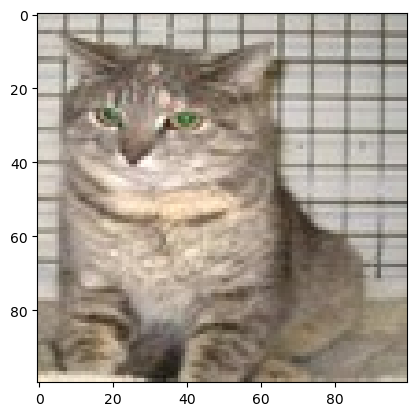

In [8]:
# Display a random image from the training set
idx = random.randint(0, len(X_train) - 1)
plt.imshow(X_train[idx])
plt.show()


# Model

In [10]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [11]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [12]:
# Train the model with validation data
history = model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_data=(X_val, Y_val))

Epoch 1/5


25/25 [==============================] - 12s 311ms/step - loss: 0.7280 - accuracy: 0.5163 - val_loss: 0.6914 - val_accuracy: 0.5975
Epoch 2/5
25/25 [==============================] - 8s 342ms/step - loss: 0.6854 - accuracy: 0.5462 - val_loss: 0.6911 - val_accuracy: 0.5100
Epoch 3/5
25/25 [==============================] - 10s 409ms/step - loss: 0.6790 - accuracy: 0.5900 - val_loss: 0.6667 - val_accuracy: 0.5975
Epoch 4/5
25/25 [==============================] - 9s 370ms/step - loss: 0.6323 - accuracy: 0.6394 - val_loss: 0.6260 - val_accuracy: 0.6425
Epoch 5/5
25/25 [==============================] - 12s 484ms/step - loss: 0.5774 - accuracy: 0.7088 - val_loss: 0.6605 - val_accuracy: 0.6425


### PLOT

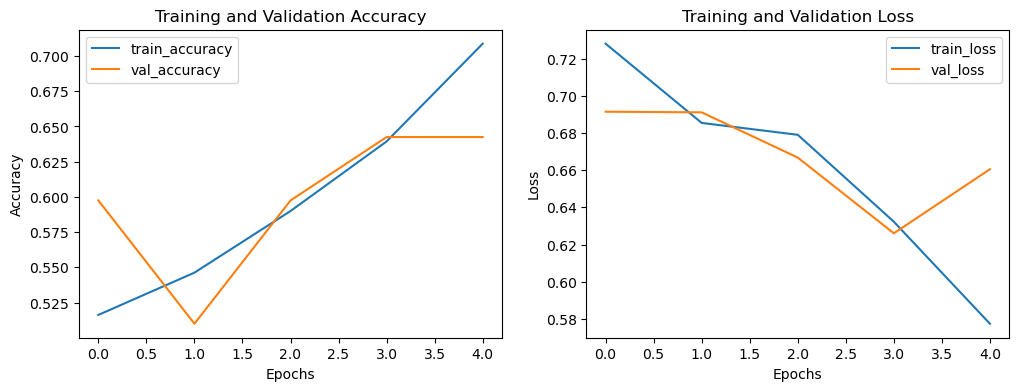

In [14]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Making predictions

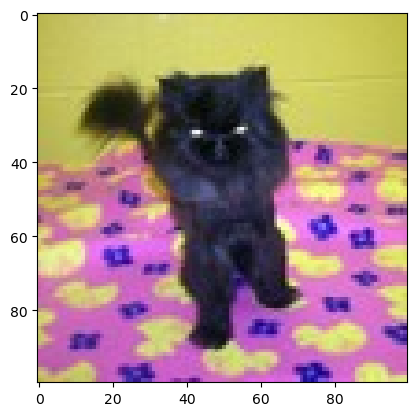

1/1 [==============================] - 0s 74ms/step
Our model says it is a : cat


In [42]:
# Display a random image from the test set and make a prediction
idx2 = random.randint(0, len(Y_test) - 1)
plt.imshow(X_test[idx2])
plt.show()

y_pred = model.predict(X_test[idx2].reshape(1, 100, 100, 3))
y_pred = (y_pred > 0.5).astype(int)

pred = 'cat' if y_pred == 1 else 'dog'
print("Our model says it is a :", pred)
